# The Network and Trajectories of Transitions 
# among Sentential Co-Occurrences of Characters of
# Arthur Conan Doyle's *A Study in Scarlet* 
## By Moses Boudourides & Sergios Lenis 

**IMPORTANT**: To use this notebook, you'll need to

1. Install IPython Notebook (easiest way: use [Anaconda](http://store.continuum.io))
2. Download this notebook and all other Python scripts used here from [https://github.com/mboudour/WordNets/ArthurConanDoyle_AStudyInScarlet_Network&Trajectories.ipynb](https://github.com/mboudour/WordNets/ArthurConanDoyle_AStudyInScarlet_Network&Trajectories.ipynb)
3. Run `ipython notebook` in the same directory where notebook and scripts were put

<a href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons License" style="border-width:0" src="http://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

## Importing Python modules 

In [1]:
import random
import nltk
import codecs
from textblob import TextBlob
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import os
import imp

# utilsdir='/home/sergios-len/Dropbox/Python Projects (1)/utils/tools.py'
utilsdir='/home/mab/Dropbox/Python Projects/utils/tools.py'

%matplotlib inline 
%load_ext autoreload

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


## I. Importing the Text of Arthur Conan Doyle's *A Study in Scarlet*

In [2]:
filename = 'Texts/AStudyInScarlet.txt'
titlename = "Arthur Conan Doyle's A Study in Scarlet"

f = codecs.open(filename, "r", encoding="utf-8").read()

num_lines = 0
num_words = 0
num_chars = 0
for line in f:
    words = line.split()
    num_lines += 1
    num_words += len(words)
    num_chars += len(line)
print "%s has number of words = %i and number of characters = %i" %(titlename,num_words,num_chars)

blob = TextBlob(f)

Arthur Conan Doyle's A Study in Scarlet has number of words = 195313 and number of characters = 260087


## II. Counting Sentential Co-Occurrences of Characters of Arthur Conan Doyle's *A Study in Scarlet* and Measuring Sentential Sentiment Polarities and Subjectivities

In [3]:
dici={'Sherlock Holmes':'Sherlock Holmes', 'Mr. Sherlock Holmes':'Sherlock Holmes', 'Sherlock':'Sherlock Holmes', 
      'Holmes':'Sherlock Holmes',
      'Dr. Watson':'Dr. Watson', 'Watson':'Dr. Watson', 
      'Lestrade':'Lestrade',
      'Lucy Ferrier':'Lucy Ferrier', 'Lucy':'Lucy Ferrier',  
      'John Ferrier':'John Ferrier',
      'John Rance':'John Rance', 'Rance':'John Rance', 
      'Arthur Charpentier':'Arthur Charpentier', 'Lieutenant Charpentier':'Arthur Charpentier', 
      'Mrs. Charpentier':'Mrs. Charpentier', 'Madame Charpentier':'Mrs. Charpentier',
      'Enoch Drebber':'Enoch Drebber', 'Enoch':'Enoch Drebber', 'Drebber': 'Enoch Drebber',  
      'Jefferson Hope':'Jefferson Hope', 'Jefferson':'Jefferson Hope', 'Hope':'Jefferson Hope',
      'Brigham Young':'Brigham Young', 'Brigham':'Brigham Young', 'Young': 'Brigham Young',  
      'Joseph Stangerson':'Joseph Stangerson', 'Joseph':'Joseph Stangerson', 'Stangerson': 'Joseph Stangerson', 
      'Tobias Gregson':'Tobias Gregson', 'Gregson':'Tobias Gregson',
      'Stamford':'Stamford'
     }

ndici={i.lower():k for i,k in dici.items()}
dnici=[(i.split()[0],i.split()[1]) for i in ndici.keys() if len(i.split())>1]

selectedTerms=ndici.keys()

In [4]:
%autoreload 2

tool= imp.load_source('tools', utilsdir)

create_pandas_dataframe_from_text=tool.create_pandas_dataframe_from_text
create_coo_graph=tool.create_coo_graph


dfst,sec_prot,coccurlist,occurlist,dflines=create_pandas_dataframe_from_text(blob,selectedTerms,ndici,titlename)
co_graph=create_coo_graph(coccurlist)

dfst.rename(columns={"Arthur Conan Doyle's A Study in Scarlet selected terms":"Arthur Conan Doyle's A Study in Scarlet Characters"},inplace=True)
dfst.sort_values(by='Frequencies').sort(["Frequencies"], ascending=[0])

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:13: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Arthur Conan Doyle's A Study in Scarlet Characters,Frequencies
12,Sherlock Holmes,98
8,Enoch Drebber,47
5,Lestrade,43
3,Jefferson Hope,42
13,Tobias Gregson,39
4,Joseph Stangerson,36
2,John Ferrier,27
0,Lucy Ferrier,18
7,Stamford,11
1,John Rance,10


In [5]:
prot_pol_sub=dflines[['protagonists','#_of_protagonists','polarity','subjectivity']].reset_index()
prot_pol_sub['sentence_id']=prot_pol_sub.index
prot_pol_sub=prot_pol_sub[['sentence_id','protagonists','#_of_protagonists','polarity','subjectivity']]

cuts = 1
prot_pol_sub = prot_pol_sub[prot_pol_sub['#_of_protagonists']>cuts]
lp = prot_pol_sub['protagonists'].tolist()
lpn = []
for i in lp:
    for j in i:
        lpn.append(j)
# len(set(lpn))
print "The total number of sentences in %s with at least %i characters in each one of them is %i." %(titlename,cuts+1,len(prot_pol_sub))
prot_pol_sub.rename(columns={'protagonists':'Lists_of_Characters','#_of_protagonists':'#_of_Characters','polarity':'Polarity','subjectivity':'Subjectivity'},inplace=True)
prot_pol_sub.sort(["#_of_Characters"], ascending=[0]) 
ddff = prot_pol_sub.drop('sentence_id', 1)
ddff.index.name = 'Sentence_ID'
ddff

The total number of sentences in Arthur Conan Doyle's A Study in Scarlet with at least 2 characters in each one of them is 42.


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:15: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Lists_of_Characters,#_of_Characters,Polarity,Subjectivity
Sentence_ID,,,,
0,"[John Rance, Sherlock Holmes]",2,0.328571,0.602381
97,"[Dr. Watson, Stamford, Sherlock Holmes]",3,0.000000,0.000000
468,"[Lestrade, Tobias Gregson]",2,-0.700000,0.666667
479,"[Lestrade, Tobias Gregson]",2,0.350000,0.644444
624,"[Lestrade, Sherlock Holmes]",2,0.000000,0.000000
666,"[Lestrade, Tobias Gregson]",2,-0.075000,0.350000
688,"[Lestrade, Tobias Gregson]",2,0.087500,0.237500
729,"[Lestrade, Tobias Gregson]",2,0.250000,0.500000
794,"[John Rance, Sherlock Holmes]",2,-0.800000,1.000000


### Basic Univarate Statistics of Selected Sentences in Arthur Conan Doyle's *A Study in Scarlet* 

In [6]:
prot_pol_sub[['#_of_Characters','Polarity','Subjectivity']].describe()

,#_of_Characters,Polarity,Subjectivity
count,42.000000,42.000000,42.000000
mean,2.095238,0.101153,0.414172
std,0.297102,0.333149,0.319287
min,2.000000,-0.800000,0.000000
25%,2.000000,0.000000,0.200000
50%,2.000000,0.083036,0.401190
75%,2.000000,0.283333,0.613318
max,3.000000,1.000000,1.000000


### The Histogram of the Number of Characters in the Selected Sentences in Arthur Conan Doyle's *A Study in Scarlet* 

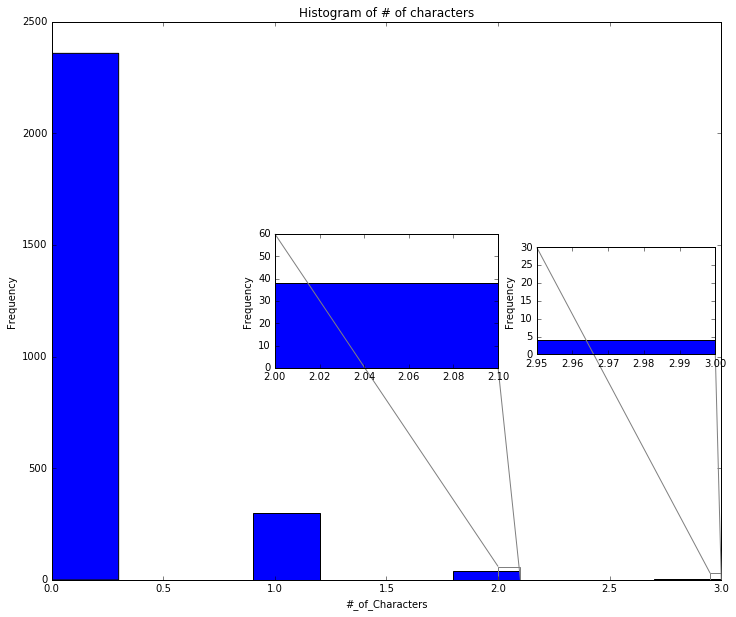

In [7]:
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

ndfl=dflines[dflines['#_of_protagonists']>0  ]

fig, ax = plt.subplots(figsize=[12, 10])
axes2 = zoomed_inset_axes(ax, 16, loc=7)  # zoom = 6

dflines['#_of_protagonists'].plot.hist(ax=ax)

ax.set_xlabel('#_of_Characters')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of # of characters')

x1, x2, y1, y2 = 2.95, 3., 0, 30
axes2.set_xlim(x1, x2)
axes2.set_ylim(y1, y2)
ndfl['#_of_protagonists'].plot.hist(ax=axes2)
axes2.set_ylabel('Frequency')

mark_inset(ax, axes2, loc1=2, loc2=4, fc="none", ec="0.5")
axes3 = zoomed_inset_axes(ax, 10, loc=10)

x1, x2, y1, y2 = 2, 2.1, 0, 60
axes3.set_xlim(x1, x2)
axes3.set_ylim(y1, y2)
ndfl['#_of_protagonists'].plot.hist(ax=axes3)
axes3.set_ylabel('Frequency')

mark_inset(ax, axes3, loc1=2, loc2=4, fc="none", ec="0.5")
plt.show()

## III. The Two-Mode Network of Characters and Sentences in Arthur Conan Doyle's *A Study in Scarlet*

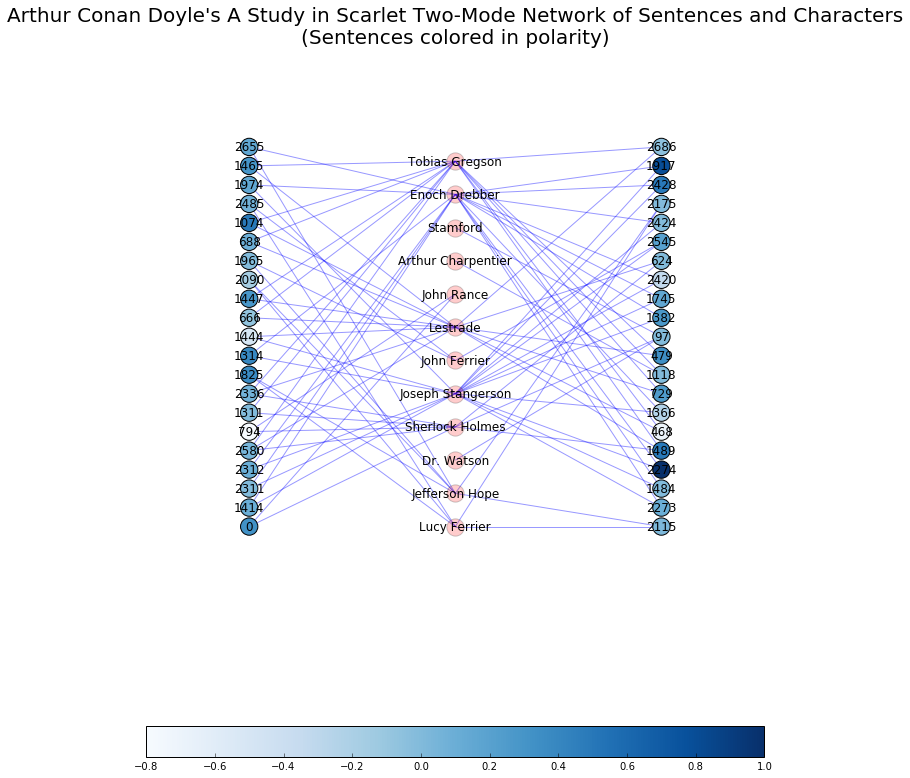

In [8]:
%autoreload 2

from tools import draw_network_node_color

sstt="%s Two-Mode Network of Sentences and Characters" %titlename
pos=nx.spring_layout(sec_prot)
nds=[nd for nd in sec_prot.nodes() if isinstance(nd,int)]
prot=[nd for nd in sec_prot.nodes() if nd not in nds]

for en,nd in enumerate(nds):
    if en<len(nds)/2.:
        pos[nd][0]=-1
        pos[nd][1]=en*2./len(nds)
    else:
        pos[nd][0]=1
        pos[nd][1]=(en-len(nds)/2.)*2./len(nds)
for en ,nd in enumerate(prot):
    pos[nd][0]=0
    pos[nd][1]=en*1./len(prot)

possit=draw_network_node_color(sec_prot,sstt,pos=pos,with_edgewidth=False,withLabels=True,labfs=12,valpha=0.2,
                               ealpha=0.4,labelfont=15,with_node_weight=False,node_size_fixer=300.,node_col='polarity')

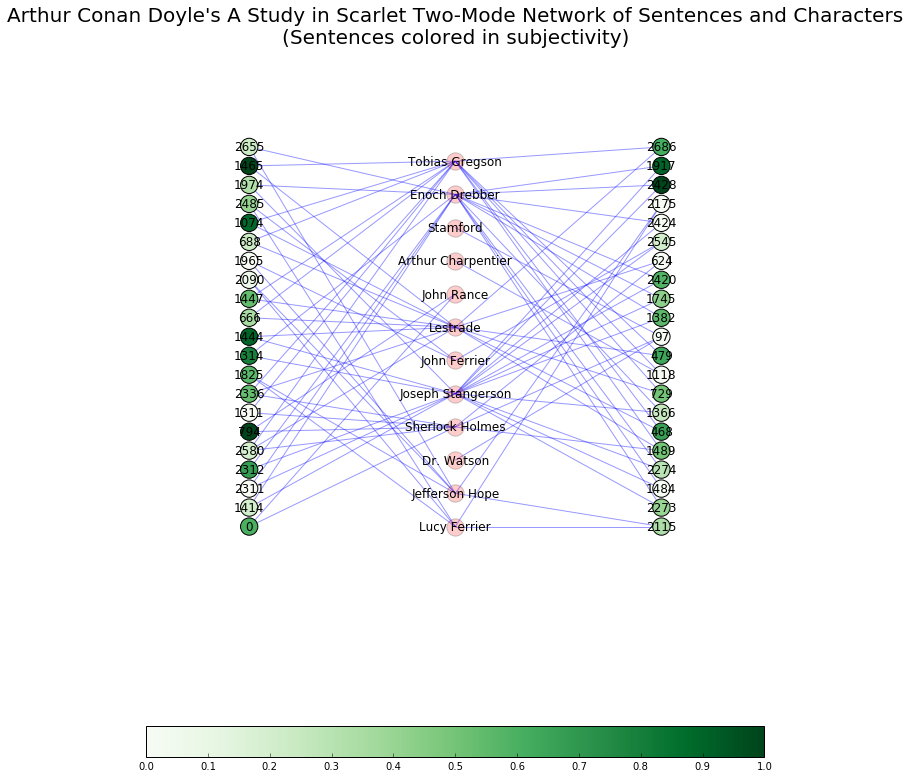

In [9]:
possit=draw_network_node_color(sec_prot,sstt,pos=pos,with_edgewidth=False,withLabels=True,labfs=12,valpha=0.2,
                               ealpha=0.4,labelfont=15,with_node_weight=False,node_size_fixer=300.,
                               node_col='subjectivity',colormat='Greens')

## IV. The Network of Sententially Co-Occurring Characters in Arthur Conan Doyle's *A Study in Scarlet*

In [10]:
prot_pol_sub.columns

Index([u'sentence_id', u'Lists_of_Characters', u'#_of_Characters', u'Polarity',
       u'Subjectivity'],
      dtype='object')

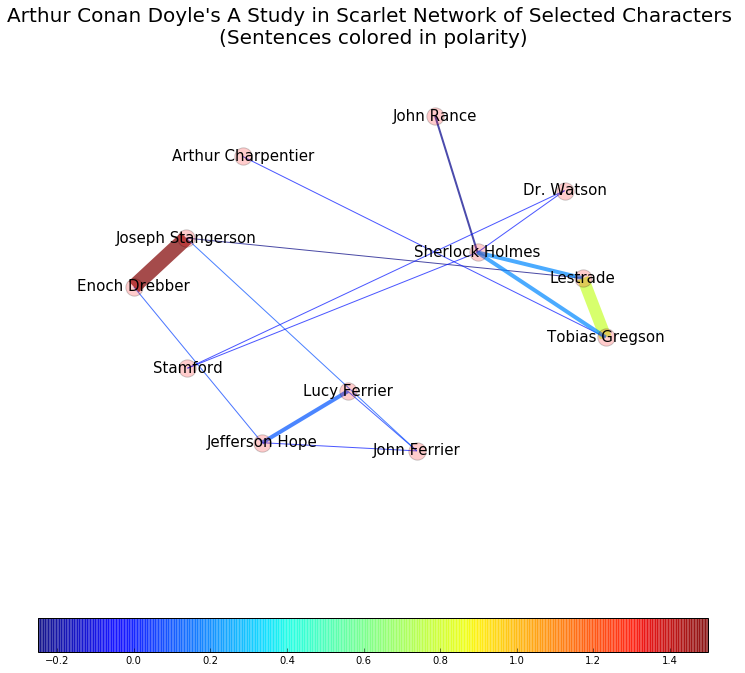

In [11]:
%autoreload 2

from tools import draw_network, make_graph_from_lists

plist = prot_pol_sub['Lists_of_Characters'].tolist()
pplist=prot_pol_sub['Polarity'].tolist()
nplist=prot_pol_sub['#_of_Characters'].tolist()
splist=prot_pol_sub['Subjectivity'].tolist()

G = make_graph_from_lists(plist,pplist,nplist,splist)
posg=nx.spring_layout(G,scale=50,k=0.55,iterations=20)
# posg=nx.spring_layout(G,scale=50)#,k=0.55)#,iterations=20)

sstt="%s Network of Selected Characters \n(Sentences colored in polarity)" %titlename
possit=draw_network(G,sstt,pos=posg,with_edgewidth=True,withLabels=True,labfs=15,valpha=0.2,ealpha=0.7,labelfont=15,
                   with_edgecolor=True,edgecolor='polarity',colormat='Blues')

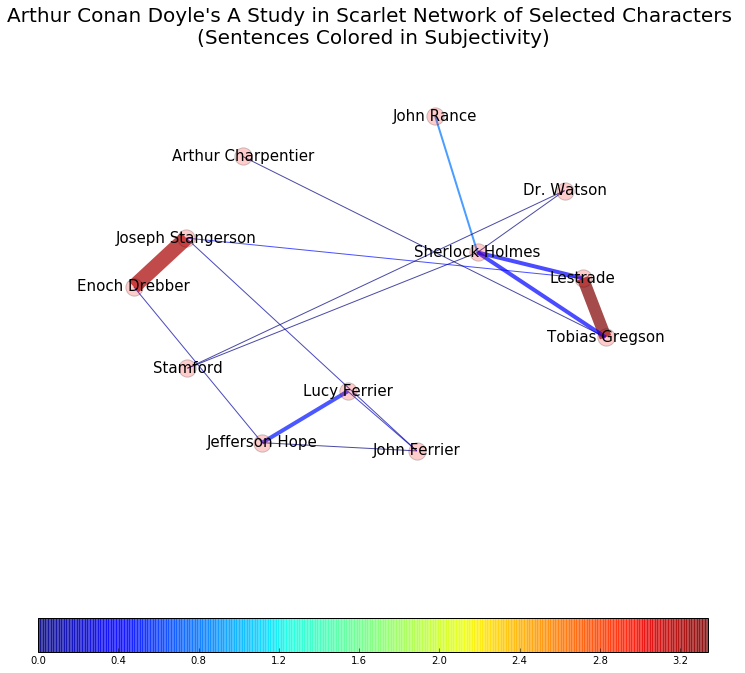

In [12]:
sstt="%s Network of Selected Characters \n(Sentences Colored in Subjectivity)" %titlename
possit=draw_network(G,sstt,pos=posg,with_edgewidth=True,withLabels=True,labfs=15,valpha=0.2,ealpha=0.7,labelfont=15,
                   with_edgecolor=True,edgecolor='subjectivity',colormat='Greys')

## V. Centralities of Nodes in the Network of Sententially Co-Occurring Characters in Arthur Conan Doyle's *A Study in Scarlet*

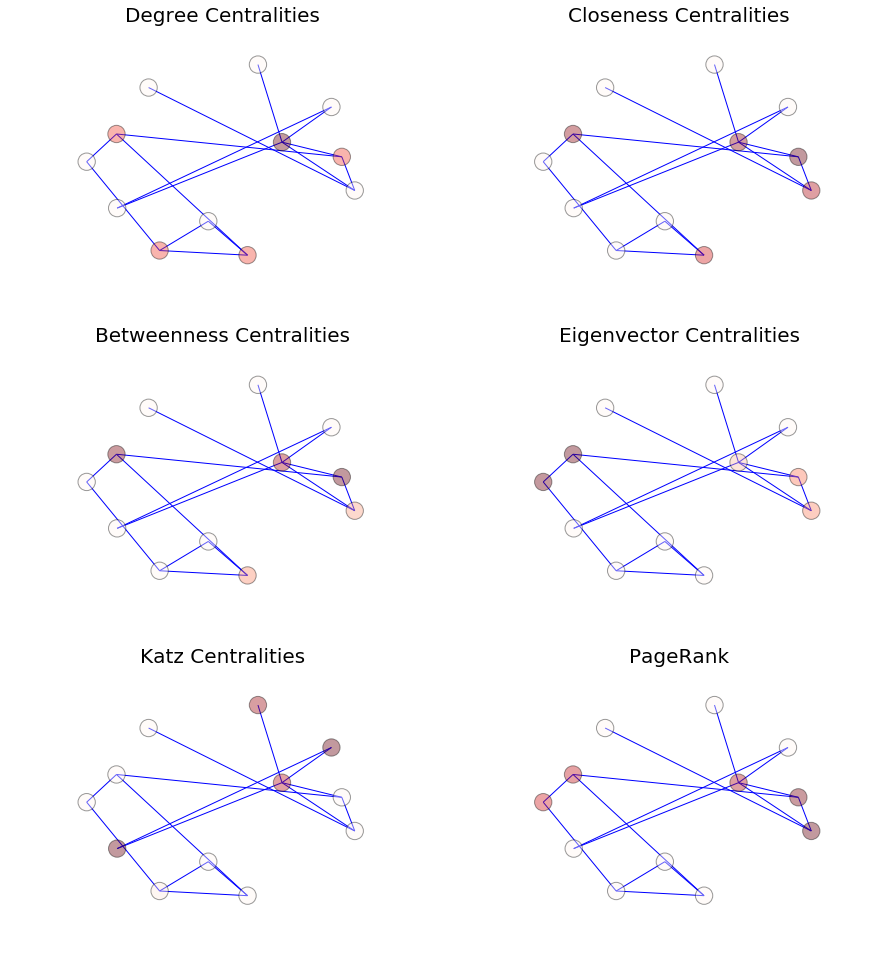

In [13]:
from tools import draw_centralities_subplots

centrali=draw_centralities_subplots(G,pos=posg,withLabels=False,labfs=5,figsi=(15,22),ealpha=1,vals=True)

### The table of Centralities of Nodes in the Network of Sententially Co-Occurring Characters in Arthur Conan Doyle's *A Study in Scarlet*

In [14]:
dfc=pd.DataFrame()
u=0
for i,k in centrali.items():
    dfc.insert(u,i,k.values())
    u+=1
dfc.insert(0,'Nodes',centrali[centrali.keys()[0]].keys())
dfc

,Nodes,closeness_centrality,katz_centrality,betweenness_centrality,page_rank,eigenvector_centrality,degree_centrality
0,Lucy Ferrier,0.297297,0.034232,0.000000,0.067136,0.015642,0.181818
1,John Rance,0.333333,0.460540,0.000000,0.031500,0.019923,0.090909
2,John Ferrier,0.379310,-0.005944,0.218182,0.040918,0.017814,0.272727
3,Jefferson Hope,0.305556,0.037098,0.027273,0.075957,0.010658,0.272727
4,Joseph Stangerson,0.478261,0.005044,0.518182,0.124880,0.046058,0.272727
5,Lestrade,0.523810,-0.142298,0.545455,0.152311,0.631325,0.272727
6,Arthur Charpentier,0.314286,-0.145618,0.000000,0.020464,0.010658,0.090909
7,Stamford,0.343750,0.520654,0.000000,0.038260,0.048342,0.181818
8,Enoch Drebber,0.366667,0.016179,0.072727,0.116920,0.640995,0.181818
9,Dr. Watson,0.343750,0.520654,0.000000,0.038260,0.295491,0.181818


## VI. Communities of Nodes in the Network of Sententially Co-Occurring Characters in Arthur Conan Doyle's *A Study in Scarlet*

Number of communities of Arthur Conan Doyle's A Study in Scarlet Network of Selected Characters 
(Sentences Colored in Subjectivity) = 3
Community partition of Arthur Conan Doyle's A Study in Scarlet Network of Selected Characters 
(Sentences Colored in Subjectivity):
[['Lucy Ferrier', 'John Ferrier', 'Jefferson Hope'], ['John Rance', 'Lestrade', 'Arthur Charpentier', 'Stamford', 'Dr. Watson', 'Sherlock Holmes', 'Tobias Gregson'], ['Joseph Stangerson', 'Enoch Drebber']]
Community modularity of Arthur Conan Doyle's A Study in Scarlet Network of Selected Characters 
(Sentences Colored in Subjectivity) = 0.5306


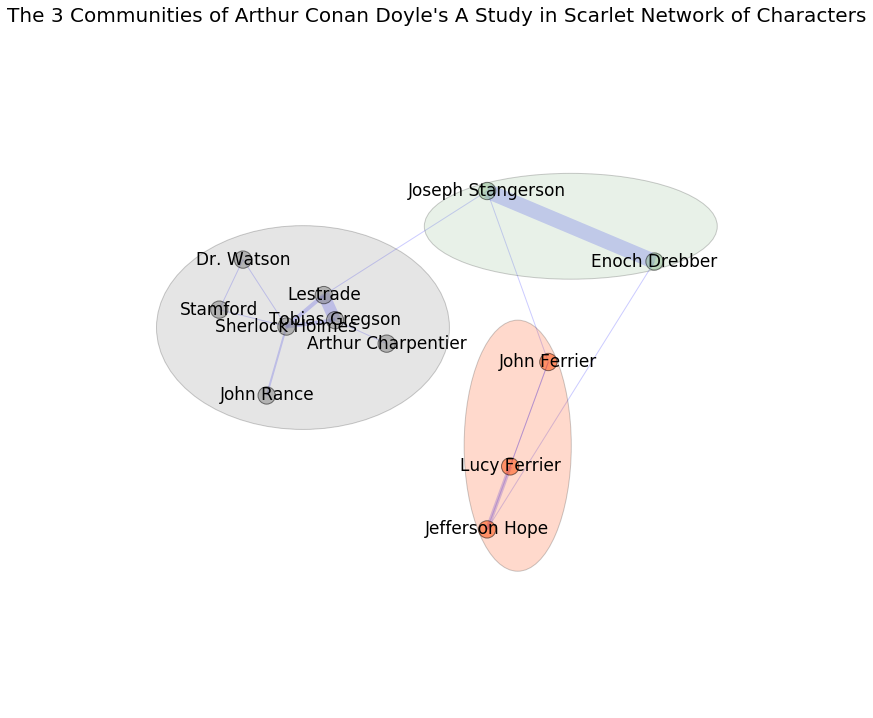

In [15]:
%autoreload 2
from tools import draw_comms, modul_arity, print_communities

part,nodper=print_communities(G,sstt)
ndfl=dflines[dflines['#_of_protagonists']>0  ]
# ndfl['#_of_protagonists'].plot.hist()
d=0.8 
dd=0.8
c=1.2
cc=1.4
alpha=0.2
ealpha=0.2
vcc={}
sstta="The %s Communities of %s Network of Characters" %(max(part.values())+1,titlename)#sstt)

draw_comms(G,G.nodes(),[],[],[] ,part,part,d,dd,c,cc,alpha,ealpha,nodper,sstta,titlefont=20,labelfont=17,valpha=0.5)

## VII. Trajectories of Transitions among Sentential Co-Occurrences of Sherlock Holmes with Other Characters of Arthur Conan Doyle's *A Study in Scarlet*

### More about Transitions and Trajectories in Temporal Networks:

### http://www.slideshare.net/MosesBoudourides/trajectories1

In [16]:
%autoreload 2

# !pip install --user pygexf
# !pip install --user pyinterval
# !pip install --user pyinter
# !pip install --user python-igraph
import trajectories as trj
# import create_gexf_year as cgy

### Transitions among Sentential Co-Occurrences of *Sherlock Holmes* and Other Characters of Arthur Conan Doyle's *A Study in Scarlet* 


Statistics of trajectories of first mode vertices

7 trajectories analyzed.
Trajectories of Lestrade: 2
Trajectories of Dr. Watson: 1
Trajectories of Stamford: 1
Trajectories of John Rance: 2
Trajectories of Tobias Gregson: 1

Statistics of trajectories of second mode vertices

4 trajectories analyzed.
Trajectories of Sherlock Holmes: 4


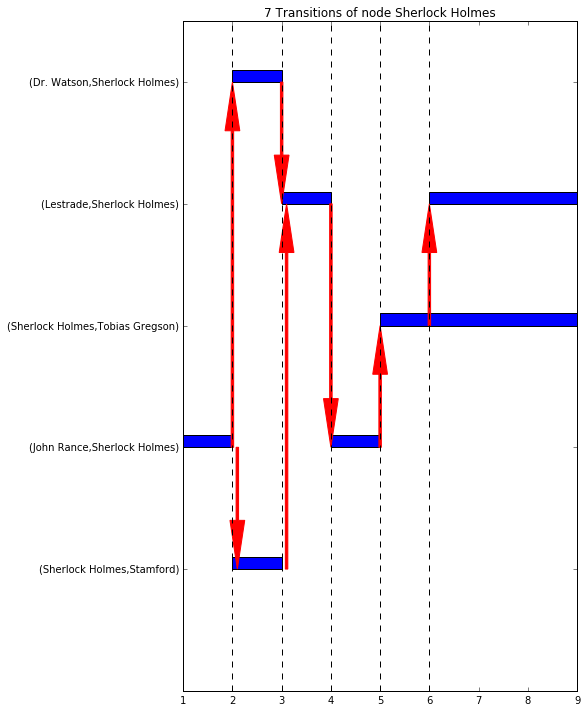

In [17]:
def search_in_list(x):
    l=x['protagonists']
    return 'Sherlock Holmes' in l
ndfl=dflines[dflines['#_of_protagonists']>1  ]
dialogs=ndfl[ndfl.apply(search_in_list,axis=1) ==True]
protagonists=dialogs.protagonists.tolist()
start=range(1,len(protagonists)+1)
end=range(2,len(protagonists)+2)
polarities=dialogs.polarity.tolist()
subj=dialogs.subjectivity.tolist()
qq=0
figi=None
search_name='Sherlock Holmes'

G,ndls,pold,subjd=trj.creatTestGraph_pandas_bip(start,end,protagonists,search_name,polarities,subj)
trajpdfs=trj.main_work_search_name(G,ndls,qq,figi,search_name,verb=False,plot_first_mode=False)

### Statistics of the Trajectory of Transitions among Sentential Co-Occurrences of *Sherlock Holmes* and Other Characters of Arthur Conan Doyle's *A Study in Scarlet* 

In [18]:
trajpdfs["['Sherlock Holmes']"]

,Vertices,fOriginator,fTransmitter,fTerminator,fBlackHole,fInvolvement,pOriginator,pTransmitter,pTerminator,pBlackHole,lOriginator,lTransmitter,lTerminator,lBlackHole,lInvolvement,Position,RelPosition,Betweenness
0,Lestrade,0,4,2,0,4,0,1.0,0.5,0,0.0,5.5,6,0,5.5,4.0,63.333333,32
1,John Rance,4,4,0,0,4,1,1.0,0.0,0,5.5,5.5,0,0,5.5,2.5,33.750000,0
2,Stamford,0,2,0,0,2,0,1.0,0.0,0,0.0,5.5,0,0,5.5,2.0,22.500000,7
3,Dr. Watson,0,2,0,0,2,0,1.0,0.0,0,0.0,5.5,0,0,5.5,2.0,22.500000,7
4,Tobias Gregson,0,2,2,0,4,0,0.5,0.5,0,0.0,6.0,5,0,5.5,5.0,90.000000,8


### The Trajectory of Transitions among Sentential Co-Occurrences of *Sherlock Holmes* and Other Characters of Arthur Conan Doyle's *A Study in Scarlet* :

#### Nodes are Co-Occurrences of *Sherlock Holmes* with Other Characters 

#### The Color of Nodes Corresponds to Sentential Sentiment Polarities Varying from Color Red (-1) to Color Green (1)

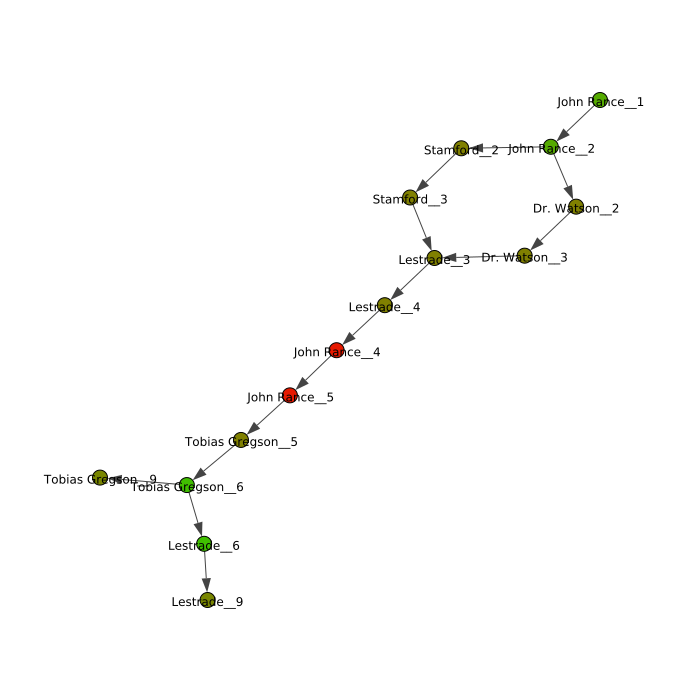

In [19]:
%autoreload 2
import igraph as ig

from tools import igraph_draw_traj
filname='S_out_graphs/Sherlock Holmes_graph.graphml'
g,visual_style,layout=igraph_draw_traj(filname,pold)

ig.plot(g,  **visual_style)

#### The Color of Nodes Corresponds to Sentential Sentiment Subjectivities Varying from Color Red (0) to Color Green (1)

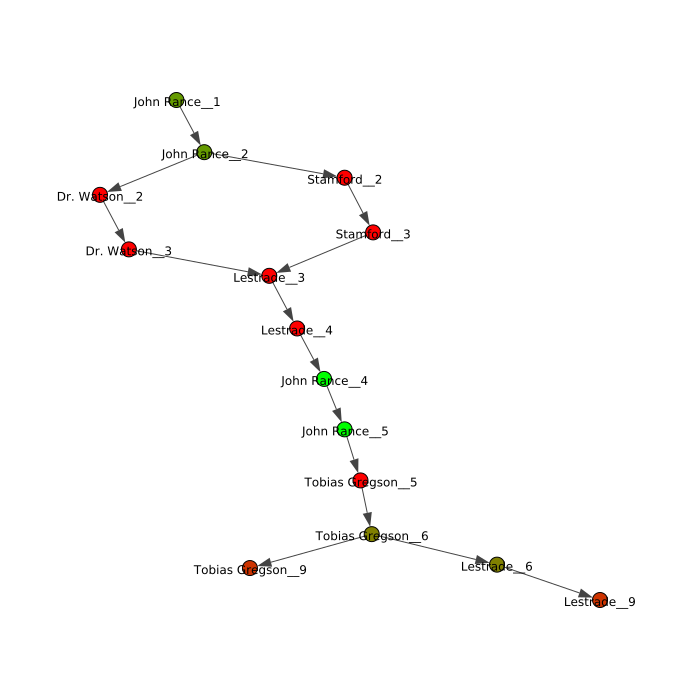

In [20]:
filname='S_out_graphs/Sherlock Holmes_graph.graphml'

g,visual_style,layout=igraph_draw_traj(filname,subjd,polar=False)

ig.plot(g,  **visual_style)